# 1 - Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Data Customer Telco

Objective : Buatlah model deep learning untuk menentukan apakah seorang customer akan churn atau tidak


# 2 - Import Libraries

In [35]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# Untuk evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 3 - Data Loading

In [280]:
# Import data yang akan digunakan

data_ori = pd.read_csv('h8dsft_Milestone1P2_immanuel_yosia_alfrenco.csv')

In [281]:
# Duplikasi dataset untuk backup

data = data_ori.copy()

In [282]:
# Code supaya dataframe menampilkan semua column
pd.set_option('display.max_columns', None)

In [283]:
# Mengecek head

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [284]:
# Mengecek tail

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [285]:
# check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data yang akan digunakan ternyata memiliki 21 kolom dimana ada 3 kolom bertipe numeric dan sisanya bertipe object.

Karena TotalCharges merupakah jumlah tagihan dan seharusnya bertipe numeric, maka akan kita ubah terlebih dahulu dari object menjadi numeric

In [286]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 4 - Exploratory Data Analysis (EDA)

## Numerical Data Summary

In [105]:
# check dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## Customer Basic Info

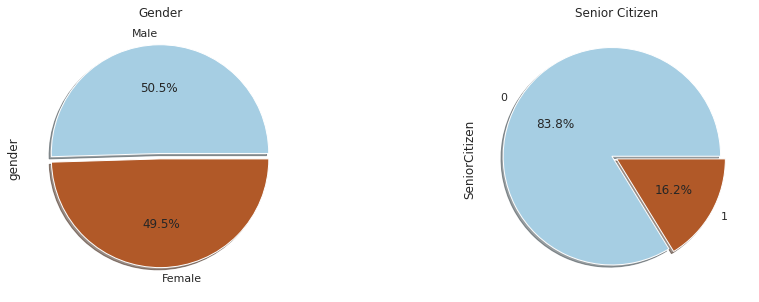

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Gender')

plt.subplot(1, 2, 2)
data['SeniorCitizen'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Senior Citizen')
plt.show()

Visual di atas menunjukan bahwa customer telco terdiri dari pria sebanyak 50.5% dan wanita sebanyak 49.5%. Kita juga bisa melihat ternyata mayoritas customer telco ternyata berada dibawah umur 65 tahun yaitu sebanyak 83.8% dan yang di atas 16.2% merupakah senior citizen dengan umur di atas 65 tahun.

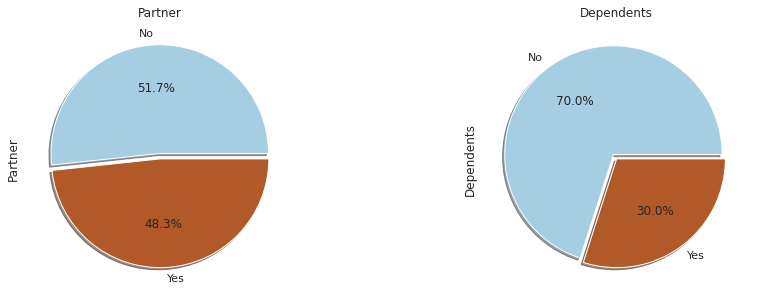

In [107]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['Partner'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Partner')

plt.subplot(1, 2, 2)
data['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Dependents')
plt.show()

Kita bisa melihat bahwa ternyata 51.7% customer telco belum punya pasangan dan 48.3% sudah punya pasangan. Kita juga biaa mengetahui bahwa 70% customer telco ini belum memiliki tanggungan selain dirinya dan 30% sisanya memiliki tanggungan lain.

## Tenure

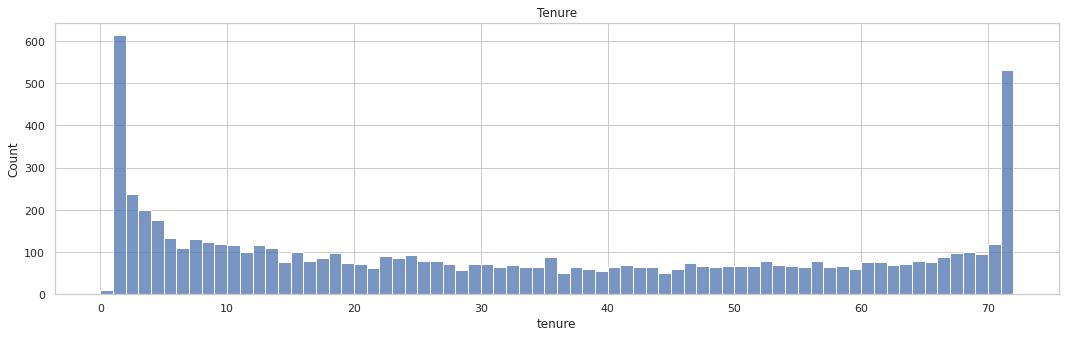

32.37114865824223

In [108]:
plt.figure(figsize=(18,5))
sns.histplot(x='tenure', data=data, palette='Set1', bins=72)
plt.title('Tenure')
plt.show()
data.tenure.mean()

Tenure menunjukan berapa lama customer ini menggunakan telco dengan rata-rata customer sudah menggunakan telco selama 32 bulan dimana yang paling lama adalah sudah menggunakan selama 72 bulan. Kita juga bisa lihat banyak customer baru yang baru sebulan menggunakan telco, selain itu banyak juga customer yang sudah menggunakan telco selama 72 bulan.

## Phone Services

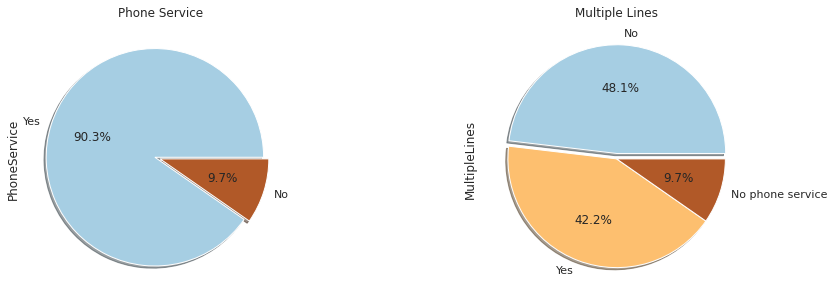

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['PhoneService'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Phone Service')

plt.subplot(1, 2, 2)
data['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Multiple Lines')
plt.show()

Visual di atas menunjukan bahwa sebanyak 90.3% customer sudah memiliki/menggunakan layanan telfon telco dah 9.7% sisanya tidak dimana dari 90.3% tersebut ternyata 48.1% menggunakan hanya satu layanan telfon sedangkan 42.2% menggunakan lebih dari satu layanan telfon.

## Internet Services

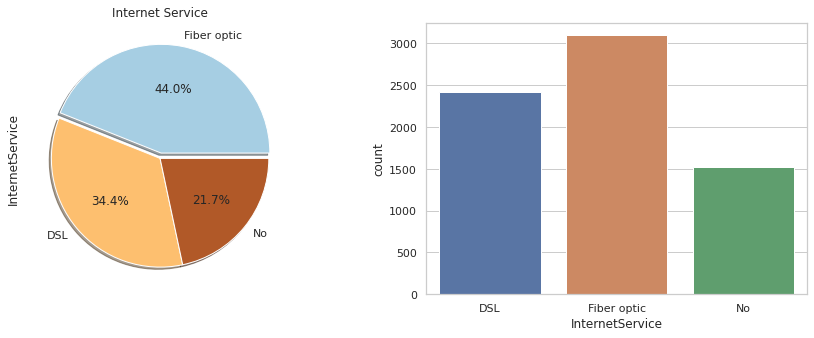

Customer who use Telco Internet Service :  5517
Customer who doesnt use Telco Internet Service :  1526


In [110]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Internet Service')

plt.subplot(1, 2, 2)
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='InternetService')
plt.show()

dsl = data.InternetService.value_counts()['DSL']
fo = data.InternetService.value_counts()['Fiber optic']
print('Customer who use Telco Internet Service : ', dsl+fo)
print('Customer who doesnt use Telco Internet Service : ',  data.InternetService.value_counts()['No'])

Customer telco ternyata sebanyak 44% menggunakan layanan internet dengan jenis fiber optic, 34.4% menggunakan layanan internet tipe DSL, dan 21.7% sisanya belum menggunakan layanan internet.

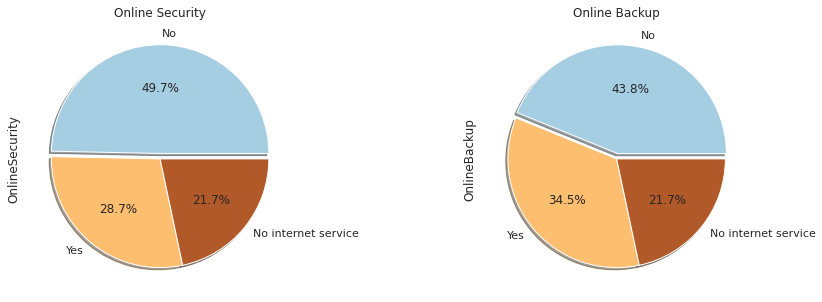

In [111]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['OnlineSecurity'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Online Security')

plt.subplot(1, 2, 2)
data['OnlineBackup'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Online Backup')
plt.show()

Ternyata dari 78.4% customer yang menggunakan layanan internet, hanya 28.7% yang memiliki sistem keamanan online dan 49.7% belum punya sistem pertahanan online. Kita juga bisa melihat hanya 34.5% yang memiliki online backup, sedangkan 43.8% tidak punya online backup.

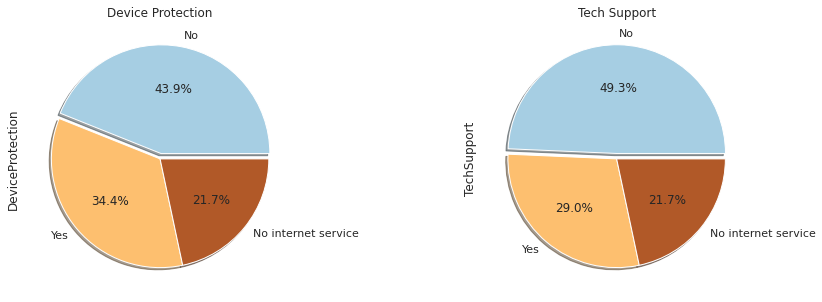

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['DeviceProtection'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Device Protection')

plt.subplot(1, 2, 2)
data['TechSupport'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Tech Support')
plt.show()

Ternyata 43.9% customer yang menggunakan layanan internet tidak memiliki proteksi pada device mereka sedangkan 34.4% sudah memiliki proteksi untuk device mereka. Kita juga bisa lihat ternyata 49.3% customer yang menggunakan layanan internet tidak pernah menggunakan tech support sedangkan 29% pernah menggunakan tech support Telco.

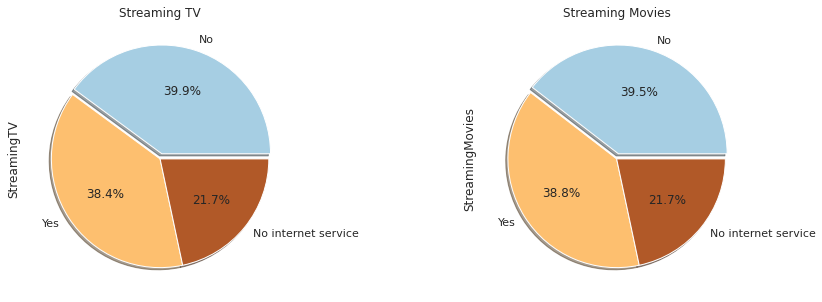

In [113]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['StreamingTV'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Streaming TV')

plt.subplot(1, 2, 2)
data['StreamingMovies'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Streaming Movies')
plt.show()

Ternyata 38.4% customer yang menggunakan internet memiliki layanan streaming tv dan 39.9% tidak memiliki streaming tv. Kita juga bisa lihat 38.8% menggunakan layanan streaming movies dan 39.5% tidak menggunakan streaming movies.

## Payments

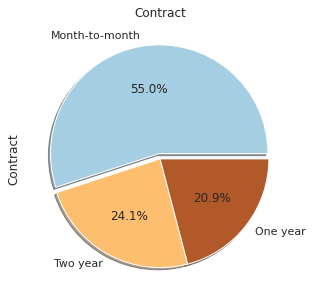

In [114]:
plt.figure(figsize=(5,5))
data['Contract'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True, cmap='Paired')
plt.title('Contract')
plt.show()

Ternyata kebanyakan customer telco sebanyak 55% memiliki kontrak perbulan, 24.1% customer memilih kontrak selama 2 tahun, dan 20.9% sisanya kontrak selama setahun.

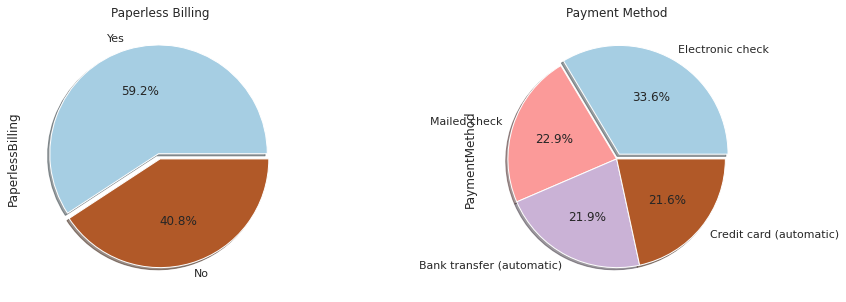

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['PaperlessBilling'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Paperless Billing')

plt.subplot(1, 2, 2)
data['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0, 0], shadow=True, cmap='Paired')
plt.title('Payment Method')
plt.show()

Visual di atas menunjukan bahwa sebanyak 59.2% customer memilih menggunakan paperless billing/e-billing sedangkan 40.8% masih memilih menggunakan tagihan kertas. Kita juga bisa melihat metode pembayaran customer Telco dimana 33.6% menggunakan electronic check, 22.9% menggunakan mailed check, 21.9% menggunakan transfer bank, dan 21.6% sisanya menggunakan kartu kredit.

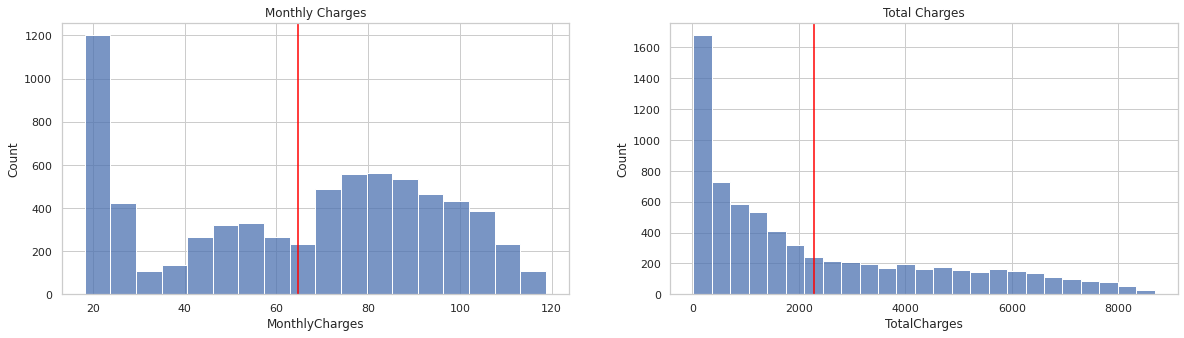

In [116]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='MonthlyCharges')
plt.axvline(x=data.MonthlyCharges.mean(), color='red')
plt.title('Monthly Charges')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='TotalCharges')
plt.axvline(x=data.TotalCharges.mean(), color='red')
plt.title('Total Charges')
plt.show()

Kita bisa melihat jumlah tagihan perbulan dan tagihan total para customer Telco. 
* Untuk tagihan perbulan berkisar antara 18 dollar sampai 118 dollar dengan rata-rata tagihan perbulan sebesar 64 dollar. 
* Untuk tagihan total berkisar antara 18 dollar sampai 8684 dollar dengan rata-rata total tagihan sebesar 2283 dollar.

## Churn (Target)

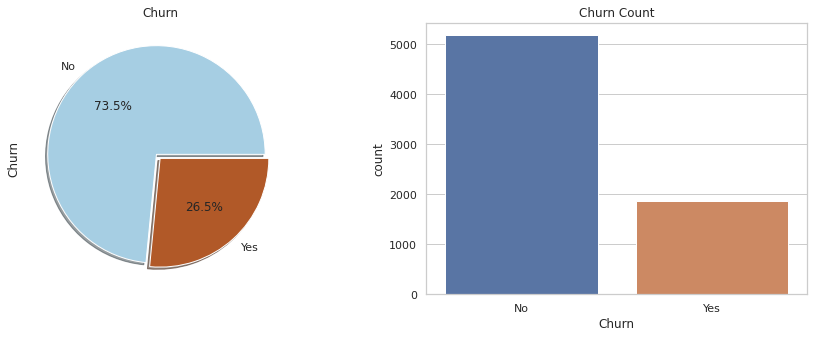

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Churn')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Churn')
plt.title('Churn Count')
plt.show()

Kita bisa melihat jumlah dan persentase dari customer yang melakukan churn/memutus langganan dengan Telco. Sebanyak 26.5% customer ternyata memilih untuk memutuskan langganan atau churn dengan Telco sedangkan 73.5% memilih untuk bertahan.

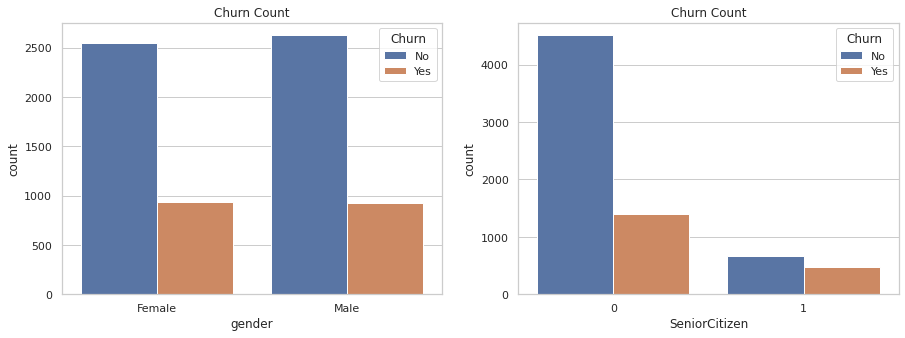

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='gender', hue='Churn')
plt.title('Churn Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')
plt.title('Churn Count')
plt.show()

Kalau dilihat dari plot ternyata kedua gender pria dan wanita memiliki jumlah churn yang hampir sama. Kita juga bisa melihat bahwa lebih banyak anak muda yang churn dari pada orang tua.

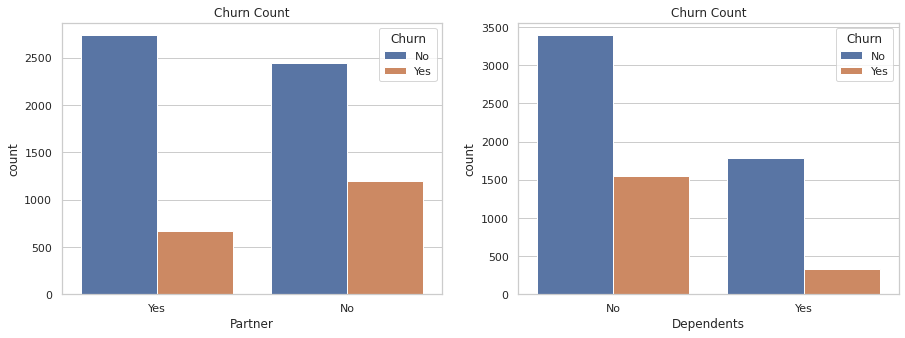

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Partner', hue='Churn')
plt.title('Churn Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Dependents', hue='Churn')
plt.title('Churn Count')
plt.show()

Kita bisa melihat ternyata orang yang tidak memiliki pasangan lebih banyak churn daripada orang yang memiliki pasangan. Jumlah orang yang churn juga lebih banyak pada orang yang memiliki tanggungan.

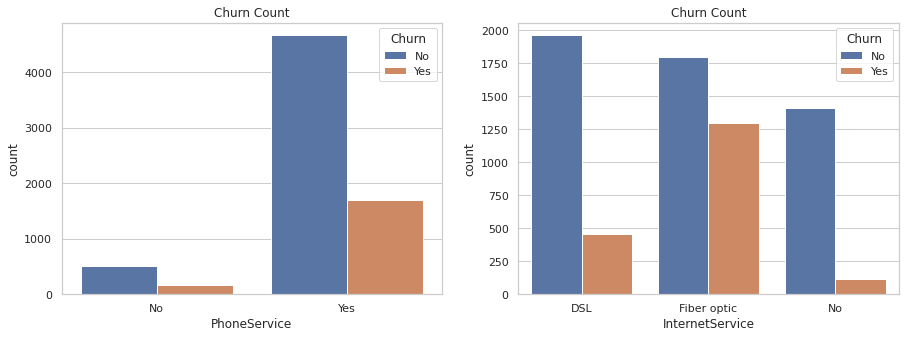

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='PhoneService', hue='Churn')
plt.title('Churn Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='InternetService', hue='Churn')
plt.title('Churn Count')
plt.show()

Visual di atas menunjukan orang yang berlangganan internet menggunakan fiber optic lebih banyak churn daripada yang menggunakan DSL maupun tidak berlangganan internet

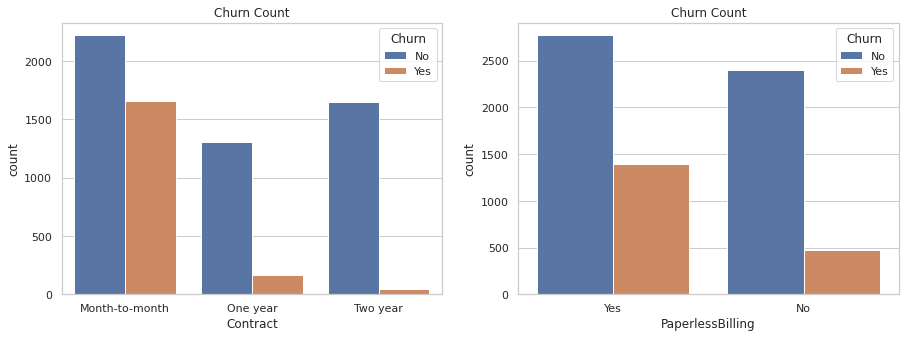

In [121]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Contract', hue='Churn')
plt.title('Churn Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='PaperlessBilling', hue='Churn')
plt.title('Churn Count')
plt.show()

Dalam grafik contract kita bisa melihat jumlah churn paling banyak berasal dari orang yang hanya kontrak perbulan dibandingkan yang kontrak setahun ataupun dua tahun. Untuk paperless biling ternyata yang paling banyak churn adalah orang yang tagihanya masih melalui kertas/surat, sedangkan yang tagihanya melalui online tidak terlalu banyak churn.

## Correlation Between Columns

Selanjutnya kita ingin mengecek korelasi antar column.

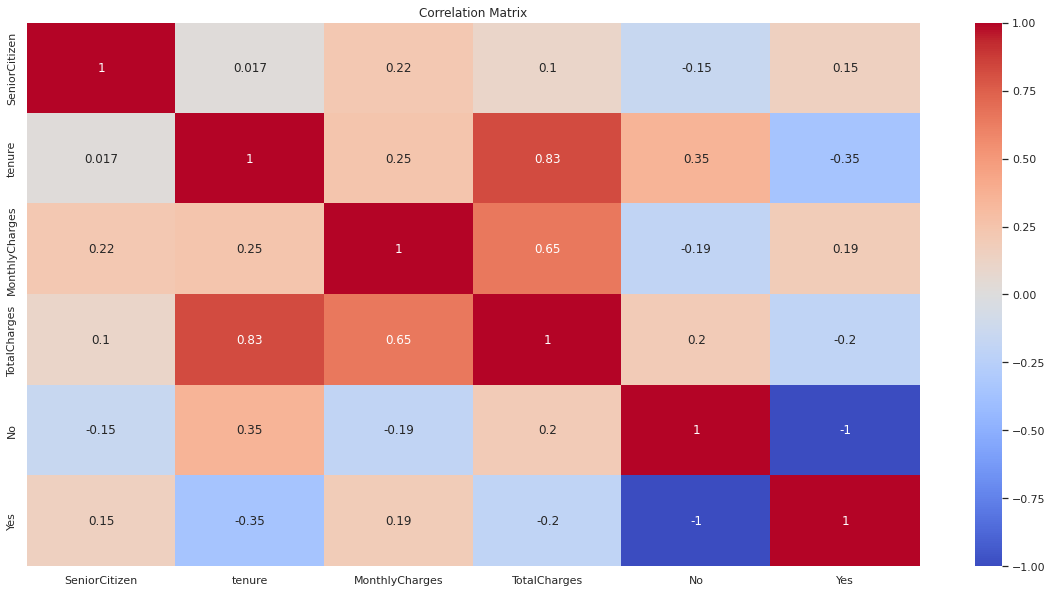

In [122]:
corr1 = pd.concat([data, pd.get_dummies(data['Churn'])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

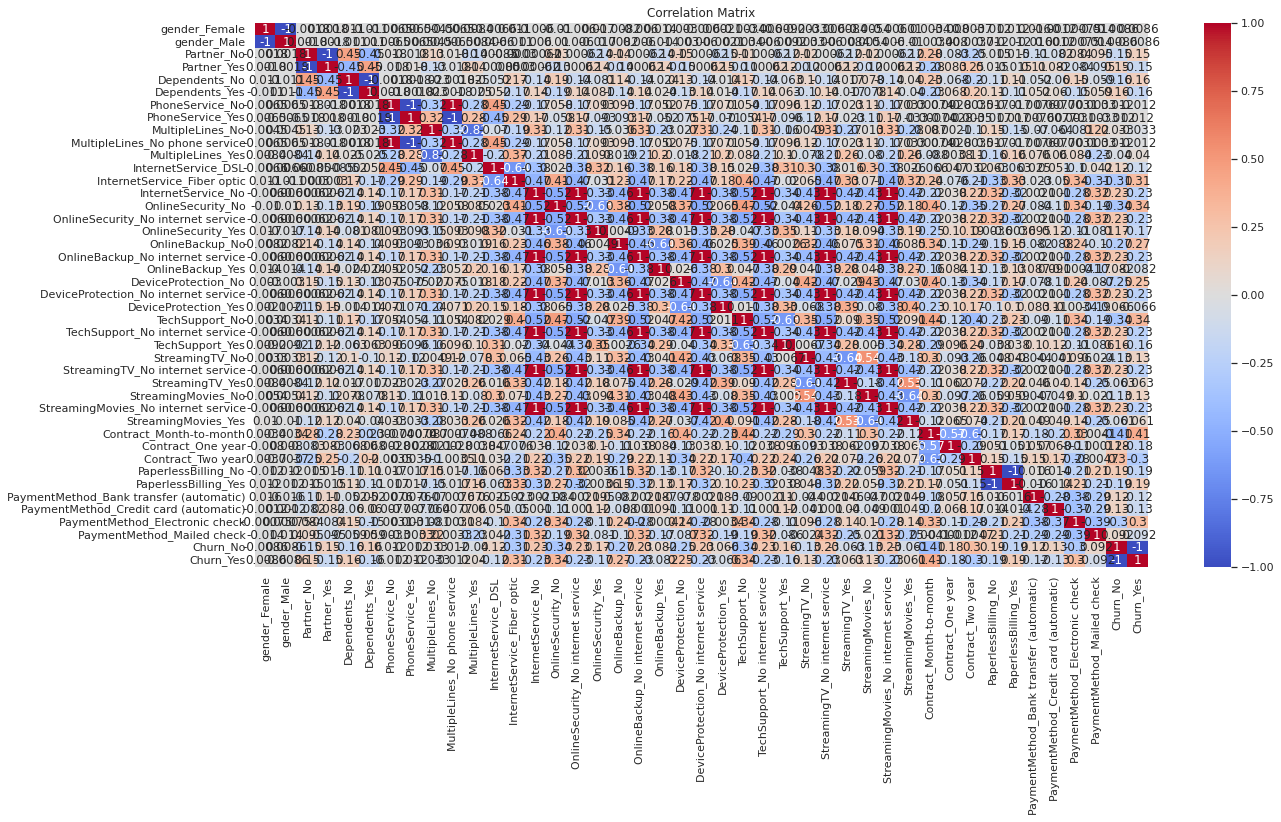

In [123]:
cat_columns = data.select_dtypes(include='object').columns.tolist()
cat_columns.remove('customerID')
corr2 = pd.get_dummies(data[cat_columns]).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap di atas kita bisa melihat bahwa `Churn` memiliki korelasi yang cukup lumayan dengan beberapa kolom seperti `Tenure`, `MonthlyCharges`, `TotalCharges`, `Partner`, `Dependents`, `InternetService`, dan lainnya.

# 5 - Data Preprocessing

## Get data for model inference

In [287]:
# Membuat data inference

data_inf = data.sample(10, random_state=50)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5585,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
3317,6685-GBWJZ,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,4448.80,No
6875,6848-HJTXY,Female,0,Yes,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1208.60,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1758,5848-FHRFC,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.90,No
3239,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799.00,No
644,8404-VLQFB,Female,0,Yes,Yes,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.25,394.85,No
3844,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.10,Yes
5924,2236-HILPA,Male,0,Yes,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,No
3107,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No


In [288]:
# Menghapus inference set dari dataset awal

data = data.drop(data_inf.index)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [289]:
# Reset index pada data Inference dan data awal agar tidak terjadi error

data_inf.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
1,6685-GBWJZ,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,4448.80,No
2,6848-HJTXY,Female,0,Yes,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1208.60,No
3,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
4,5848-FHRFC,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.90,No
5,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799.00,No
6,8404-VLQFB,Female,0,Yes,Yes,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.25,394.85,No
7,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.10,Yes
8,2236-HILPA,Male,0,Yes,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,No
9,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No


## Splitting Between Train-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set, Validation Set, dan juga Test-Set

In [197]:
# Memisahkan `X` (Features) and `y` (Targets)

X = data.drop('Churn', axis=1)
y = data['Churn']

In [198]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=data.Churn)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=17)

print("Train Size : ", X_train.shape)
print("Val Size : ", X_val.shape)
print("Test Size : ", X_test.shape)

Train Size :  (4782, 20)
Val Size :  (844, 20)
Test Size :  (1407, 20)


## Handling Missing Values

Kita akan melakukan check Missing Values pada Train Set dan Test Set

### Train_set

In [199]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [200]:
y_train.isnull().sum()

0

Ternyata ada missing values pada kolom `TotalCharges`, dan karena kolom tersebut bertipe numeric dan tipe persebaran datanya skew, maka akan kita input missing values dengan nilai median.

In [201]:
X_train['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_train['TotalCharges'].isnull().sum()

0

### Validation Set

In [202]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [203]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

y_val.isnull().sum()

0

Ternyata terdapat missing values di kolom yang sama pada Validation Set, akan kita isi juga dengan median karena datanya bertipe skewed.

In [204]:
X_val['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_val['TotalCharges'].isnull().sum()

0

### Test-Set

In [205]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [206]:
y_test.isnull().sum()

0

Ada missing values juga pada kolom `TotalCharges` dimana akan kita inputasi menggunakan nilai median.

In [207]:
X_test['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_test['TotalCharges'].isnull().sum()

0

## Handling Outliers

### Check Distribution

Sebelum menentukan metode handling outliers, kita harus mengetahui tipe distribusi dari data kita.

In [208]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

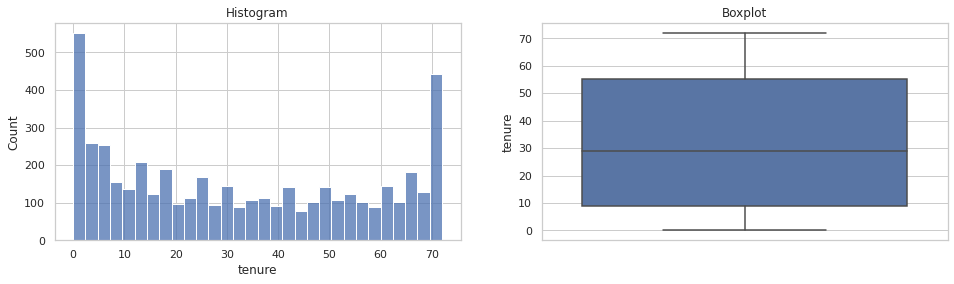

tenure skewness value :  0.23022527142639185


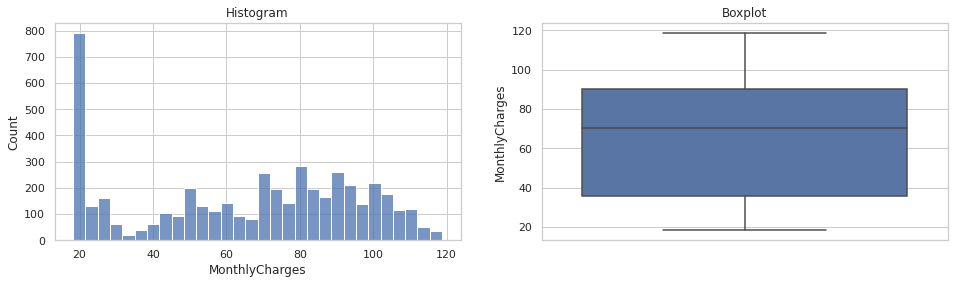

MonthlyCharges skewness value :  -0.22124081552889155


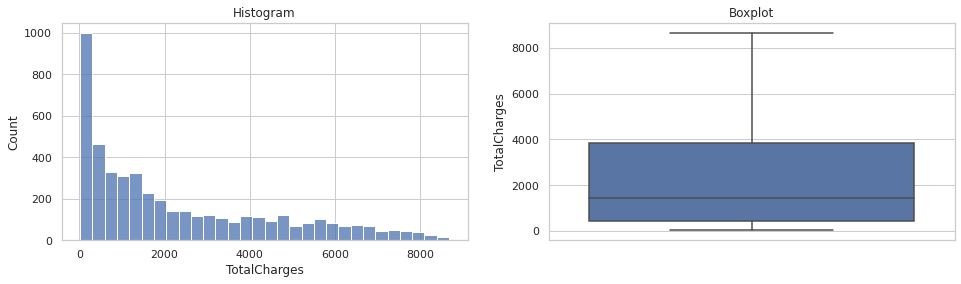

TotalCharges skewness value :  0.9527571539732385


In [209]:
diagnostic_plots(X_train, 'tenure')
diagnostic_plots(X_train, 'MonthlyCharges')
diagnostic_plots(X_train, 'TotalCharges')

Ternyata kolom numeric kita tidak memiliki outliers di dalamnya sehingga kita bisa melanjutkan ke tahap selanjutnya.


## Features Selection

Dalam kasus ini kita akan coba untuk menggunakan semua feature kecuali customerID

In [210]:
X_train.drop(columns=['customerID'], axis=1, inplace=True)
X_val.drop(columns=['customerID'], axis=1, inplace=True)
X_test.drop(columns=['customerID'], axis=1, inplace=True)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5510,Male,0,No,No,4,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),51.75,201.10
776,Male,0,No,No,2,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.00,184.65
3903,Male,0,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.55,223.15
1582,Female,0,Yes,Yes,6,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),48.95,273.25
5908,Male,0,No,No,69,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.10,1268.85


## Split between Numerical Columns and Categorical Columns

In [211]:
# Mendapatkan list Numerical columns dan Categorical columns

num_cols_norm = ['tenure', 'MonthlyCharges']
num_cols_skew = ['TotalCharges']
cat_pass = ['SeniorCitizen']
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

print('Numerical Columns Normal : ', num_cols_norm)
print('Numerical Columns Skewed : ', num_cols_skew)
print('Categorical Columns : ', cat_cols)
print('Categorical Columns Encoded : ', cat_pass)

Numerical Columns Normal :  ['tenure', 'MonthlyCharges']
Numerical Columns Skewed :  ['TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Categorical Columns Encoded :  ['SeniorCitizen']


## Features Engineering

Kita akan melakukan scaling dan encoding menggunakan pipeline

Karena data kita di atas ada yang bertipe skewed dan ada yang normal, maka akan dilakukan scaling menggunakan MinMaxScaler untuk yang skewed dan StandardScaler untuk yang normal. Untuk kolom categorical akan digunakan OneHotEncoder.

In [212]:
# Numeric and Categorical Features Engineering Pipeline
skew_pipe = Pipeline([('skew_scale', MinMaxScaler())])
norm_pipe = Pipeline([('norm_scale', StandardScaler())])
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm', norm_pipe, num_cols_norm),
    ('skew', skew_pipe, num_cols_skew),
    ('cat', cat_pipe, cat_cols),
    ('pass', 'passthrough', cat_pass)
])

In [213]:
# fit and transform

X_train = preprocess.fit_transform(X_train)
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)
X_train.shape

(4782, 45)

In [214]:
X_val.shape

(844, 45)

## Encoding Target

In [215]:
# Encode the target

labelenc = LabelEncoder()
labelenc.fit(y_train)

LabelEncoder()

In [216]:
# Tranform the target

y_train_encoded = labelenc.transform(y_train)
y_val_encoded = labelenc.transform(y_val)
y_test_encoded = labelenc.transform(y_test)

In [217]:
# Convert to dataframe

y_train_final = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_val_final = pd.DataFrame(y_val_encoded, columns=['Churn'])
y_test_final = pd.DataFrame(y_test_encoded, columns=['Churn'])

## Tensor Pipeline

In [218]:
# Create training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_final))
train_dataset = train_dataset.batch(64)

# Create val dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_final))
val_dataset = val_dataset.batch(64)

# Create test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_final))
test_dataset = test_dataset.batch(64)

Karena kita sudah mendefinisikan jumlah batch 64 menggunakan tensor pipeline maka kita tidak perlu lagi mendefinisikanya di model training.

# 6 - Model Definition

## Sequential API

In [219]:
# Create Sequential API

model_seq = Sequential()
model_seq.add(Dense(4, activation='relu', input_shape=(45,))) # Hidden layer 1
model_seq.add(Dense(1, activation='sigmoid')) # Output layer

# Compile
model_seq.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

model_seq.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 184       
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


Untuk model sequential baseline saya menggunakan satu hidden layer dengan jumlah neuron 4 dimana hidden layer tersebut menerima input sebanyak 45 feature. Activation function yang dipilih adalah relu dan sigmoid karena merupakan activation function yang paling banyak digunakan. Output dari model sequential ini adalah 1 neuron dimana neuron tersebut akan menghasilkan hasil klasifikasi.

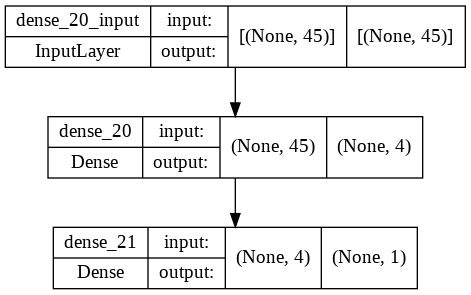

In [220]:
# Plot Layers
tf.keras.utils.plot_model(model_seq, show_shapes=True)

Visual di atas menunjukan struktur arsitektur model kita dimana terdapat InputLayer dengan 45 feature yang akan mengarah ke hidden layer dengan 4 neuron dan terakhir neuron dari hidden layer akan mengarah ke outputlayer yang berisi 1 neuron.

## Functional API

In [221]:
input_layer = Input(shape=(45,)) # input layer
hidden_layer = Dense(4, activation='relu')(input_layer) # hidden layer 1
output_layer = Dense(1, activation='sigmoid')(hidden_layer) # Output layer

model_func = Model(inputs=input_layer, outputs=output_layer)

# compile model
model_func.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

model_func.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_22 (Dense)            (None, 4)                 184       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


Untuk model functional baseline saya menggunakan arsitektur yang sama dengan model sequential dimana saya menggunakan satu hidden layer dengan jumlah neuron 4 dimana hidden layer tersebut menerima input sebanyak 45 feature dan hidden layer ini akan mengarah ke output layer, Output dari model sequential ini adalah 1 neuron dimana neuron tersebut akan menghasilkan hasil klasifikasi. Arsitektur basemodel di atas memiliki total parameter sebanyak 189 parameter.

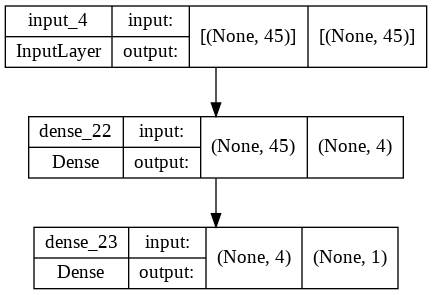

In [222]:
# Plot Layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

Visual di atas adalah struktur arsitektur model functional dimana terdapat InputLayer yang sama dengan 45 feature yang akan mengarah ke hidden layer dengan 4 neuron dan terakhir neuron dari hidden layer akan mengarah ke outputlayer yang berisi 1 neuron.

# 7 - Model Training

Pada model training ini kita akan melakukan train pada model sequential dan functional yang sudah didefinisikan di atas. Untuk kedua model saya memilih menggunakan 10 epoch dengan batch 64 yang sudah didefinisikan pada tensor pipeline.

## Sequential API

In [223]:
# Train the model

history_seq = model_seq.fit(train_dataset, validation_data=(val_dataset), epochs=10)

Epoch 1/10
75/75 [==============================] - 1s 4ms/step - loss: 0.5273 - accuracy: 0.7336 - val_loss: 0.4855 - val_accuracy: 0.7275
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7449 - val_loss: 0.4590 - val_accuracy: 0.7630
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7662 - val_loss: 0.4499 - val_accuracy: 0.7784
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.7785 - val_loss: 0.4436 - val_accuracy: 0.7938
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7861 - val_loss: 0.4393 - val_accuracy: 0.7927
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7880 - val_loss: 0.4370 - val_accuracy: 0.7962
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7911 - val_loss: 0.4353 - val_accuracy: 0.7998
Epoch 8/10
75/75 [==

## Functional API

In [224]:
# Train the model

history_func = model_func.fit(train_dataset, validation_data=(val_dataset), epochs=10)

Epoch 1/10
75/75 [==============================] - 1s 4ms/step - loss: 0.5877 - accuracy: 0.7319 - val_loss: 0.5419 - val_accuracy: 0.7453
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7547 - val_loss: 0.4785 - val_accuracy: 0.7749
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7742 - val_loss: 0.4495 - val_accuracy: 0.7891
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.7842 - val_loss: 0.4372 - val_accuracy: 0.7962
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7890 - val_loss: 0.4309 - val_accuracy: 0.7998
Epoch 6/10
75/75 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.7932 - val_loss: 0.4271 - val_accuracy: 0.8021
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7953 - val_loss: 0.4260 - val_accuracy: 0.7938
Epoch 8/10
75/75 [==

# 8 - Model Evaluation

## Model Scoring

Dalam model scoring akan dilakukan pengecekan terhadap accuracy dan loss dari setiap model dan juga pengecekan terhadap test-set menggunakan clasiffication report.

### Sequential API

In [225]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.527348,0.733584,0.485469,0.727488
1,0.472116,0.744877,0.459010,0.763033
2,0.458374,0.766207,0.449878,0.778436
3,0.450810,0.778545,0.443560,0.793839
4,0.445595,0.786073,0.439280,0.792654
5,0.441818,0.787955,0.437037,0.796209
6,0.438996,0.791092,0.435304,0.799763
7,0.436842,0.792137,0.433841,0.800948
8,0.435185,0.794228,0.433322,0.803318
9,0.433899,0.794856,0.432966,0.802133


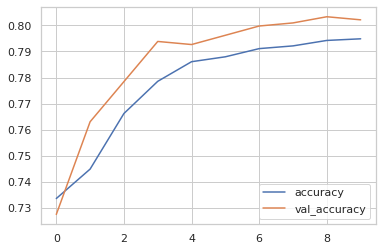

In [226]:
# Plot accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()
plt.show()

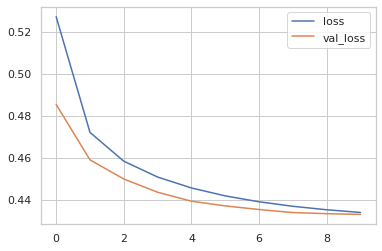

In [227]:
# Plot loss

history_seq_df[['loss', 'val_loss']].plot()
plt.show()

Dari visual di atas kita bisa melihat bahwa accuracy train dan val cukup baik dimana mengalami peningkatan tiap epochnya dan perbedaanya pun tidak terlalu jauh antara train dan val. Dari loss kita juga bisa melihat terjadi penurunan tiap epochnya yang cukup baik dan gapnya tidak terlalu besar antara train dan val.

In [228]:
# Model evaluation using clasification report

y_pred_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1034
           1       0.72      0.55      0.62       373

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita, maka dari itu tujuan kita adalah untuk meminimalisir churn rate. Menurut saya kita harus lebih berfokus pada label 0 dimana label 0 adalah orang yang tidak churn dan kita harus bisa menjaga agar customer tersebut tidak akan memutuskan hubungan dengan perusahaan sambil bisa mencari customer baru. Dengan fokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang bertahan supaya mereka tetap bertahan dan tidak churn.

Untuk precision dan recall pada label 0 sudah cukup bagus dimana kita mendapatkan precision sebesar 0.85 dan recall sebesar 0.92.
* Precision : Jadi dari 1034 customer yang tidak churn, kita berhasil mengklasifikasikan 85% customer benar tidak churn dan dan salah mengklasifikasikan 15% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
* Recall : Jadi dari 1034 customer yang tidak churn, kita berhasil mengklasifikasikan 92% customer benar tidak churn dan salah mengklasifikasikan 8% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.

### Functional API

In [229]:
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.587743,0.731911,0.541887,0.745261
1,0.505872,0.754705,0.478540,0.774882
2,0.466903,0.774153,0.449516,0.789100
3,0.448720,0.784191,0.437162,0.796209
4,0.439467,0.789000,0.430925,0.799763
5,0.432576,0.793183,0.427123,0.802133
6,0.429017,0.795274,0.426007,0.793839
7,0.426903,0.795692,0.425735,0.795024
8,0.425490,0.797574,0.425725,0.792654
9,0.424478,0.799665,0.425812,0.792654


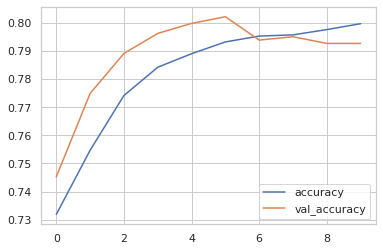

In [230]:
# Plot accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()
plt.show()

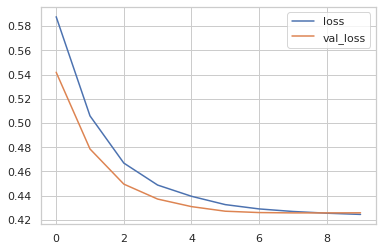

In [231]:
# Plotloss

history_func_df[['loss', 'val_loss']].plot()
plt.show()

Kita bisa melihat bahwa accuracy pada train dan val kita cukup baik dimana mereka mengalami peningkatan tiap epochnya dan perbedaanya pun tidak terlalu jauh antara train dan val. Untuk loss kita bisa melihat terjadi penurunan tiap epochnya yang cukup baik dan gapnya tidak terlalu besar antara train dan val artinya model kita bisa belajar dengan cukup baik.

In [232]:
# Model evaluation using clasification report

y_pred_func = model_func.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1034
           1       0.71      0.55      0.62       373

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



Untuk precision dan recall pada label 0, model functional kita cukup bagus dimana kita mendapatkan precision sebesar 0.85 dan recall sebesar 0.92.
* Precision : Jadi dari 1034 customer yang tidak churn, kita berhasil mengklasifikasikan 85% customer benar tidak churn dan dan salah mengklasifikasikan 15% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
* Recall : Jadi dari 1034 customer yang tidak churn, kita berhasil mengklasifikasikan 92% customer benar tidak churn dan salah mengklasifikasikan 8% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.

## Model Tuning

### Sequential API

In [259]:
# Create Sequential API

model_seq_2 = Sequential()
model_seq_2.add(Dense(32, activation='relu', input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=50))) # Hidden layer 1
model_seq_2.add(Dense(16, activation='relu')) # hidden layer 2
model_seq_2.add(Dense(8, activation='relu')) # hidden layer 3
model_seq_2.add(Dense(1, activation='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                1472      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 8)                 136       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


Pada model sequential di atas dilakukan improvement dengan menambahkan jumlah hidden layer dan juga jumlah neuron pada hidden layernya. Ada juga tambahan penggunakan initializer glorot. Saya juga mengganti optimizer dari tadinya adam menjadi nadam. Total parameter arsitektur di atas lebih banyak daripada baseline dimana baseline model memiliki jumlah parameter sebanyak 189 sedangkan setelah improvement menjadi 2145 parameter. Selain itu kali ini kita juga menggunakan 20 epoch untuk trainingnya.

In [260]:
history_seq_2 = model_seq_2.fit(train_dataset, validation_data=(val_dataset), epochs=20)

Epoch 1/20
75/75 [==============================] - 2s 4ms/step - loss: 0.5147 - accuracy: 0.7476 - val_loss: 0.4473 - val_accuracy: 0.7915
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.7921 - val_loss: 0.4322 - val_accuracy: 0.7891
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7955 - val_loss: 0.4276 - val_accuracy: 0.7950
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7944 - val_loss: 0.4257 - val_accuracy: 0.7938
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7984 - val_loss: 0.4248 - val_accuracy: 0.7950
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7992 - val_loss: 0.4240 - val_accuracy: 0.7927
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8005 - val_loss: 0.4234 - val_accuracy: 0.7938
Epoch 8/20
75/75 [==

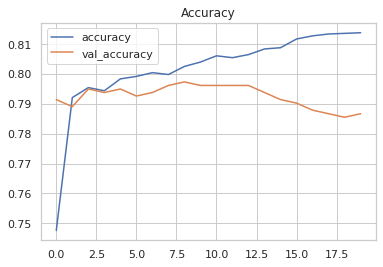

In [261]:
history_seq_2_df = pd.DataFrame(history_seq_2.history)

history_seq_2_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.show()

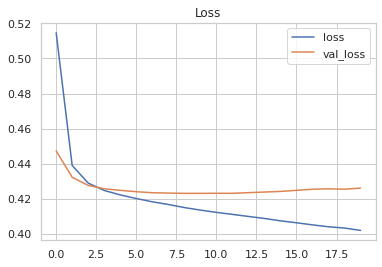

In [262]:
history_seq_2_df[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

Model hasil improvement menghasilkan accuracy dan loss yang cukup baik juga. Untuk accuracy kita bisa lihat pada train menghasilkan nilai yang lebih tinggi namun pada validation set lebih rendah dibandingkan baseline. Untuk Loss pada train set cukup baik karena terjadi penurunan yang signifikan pada lossnya, namun pada validation set lossnya cukup stabil bahkan cenderung meningkat sedikit pada akhir epoch.

In [263]:
# Model evaluation using clasification report

y_pred_seq_2 = model_seq_2.predict(X_test)
y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print('===Sebelum Improvement===')
print(classification_report(y_test_final, y_pred_seq))
print('===Setelah Improvement===')
print(classification_report(y_test_final, y_pred_seq_2))

===Sebelum Improvement===
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1034
           1       0.72      0.55      0.62       373

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

===Setelah Improvement===
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1034
           1       0.72      0.57      0.64       373

    accuracy                           0.83      1407
   macro avg       0.79      0.75      0.76      1407
weighted avg       0.82      0.83      0.82      1407



Dari classification report di atas kita bisa melihat bahwa ternyata ada peningkatan pada precision label 0 dari 0.85 menjadi 0.86 dan recall label 1 dari 0.55 menjadi 0.57.

### Functional API

In [246]:
input_layer = Input(shape=(45,)) # input layer
hidden_layer1 = Dense(32, activation='relu')(input_layer) # hidden layer 1
hidden_layer2 = Dense(16, activation='relu')(hidden_layer1) # hidden layer 2
hidden_layer3 = Dense(8, activation='relu')(hidden_layer2) # hidden layer 3
output_layer = Dense(1, activation='sigmoid')(hidden_layer3) # output layer

model = Model(inputs=input_layer, outputs=output_layer)

# compile model
model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_32 (Dense)            (None, 32)                1472      
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


Pada model functional di atas dilakukan improvement dengan menambahkan jumlah hidden layer dan juga jumlah neuron pada hidden layernya. Ada juga penggantian optimizer dari tadinya adam menjadi nadam. Total parameter arsitektur di atas lebih banyak daripada baseline dimana baseline model memiliki jumlah parameter sebanyak 189 sedangkan setelah improvement menjadi 2145 parameter. Selain itu kali ini kita juga menggunakan 20 epoch untuk trainingnya. Perbedaan dengan sequential adalah pada functional tidak menggunakan initilizer glorot.

In [248]:
history_func_2 = model.fit(train_dataset, validation_data=(val_dataset), epochs=20)

Epoch 1/20
75/75 [==============================] - 1s 5ms/step - loss: 0.5278 - accuracy: 0.7313 - val_loss: 0.4525 - val_accuracy: 0.7536
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7863 - val_loss: 0.4278 - val_accuracy: 0.7927
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7999 - val_loss: 0.4239 - val_accuracy: 0.8009
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8036 - val_loss: 0.4231 - val_accuracy: 0.7938
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8055 - val_loss: 0.4229 - val_accuracy: 0.7962
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8061 - val_loss: 0.4231 - val_accuracy: 0.7986
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8070 - val_loss: 0.4231 - val_accuracy: 0.7950
Epoch 8/20
75/75 [==

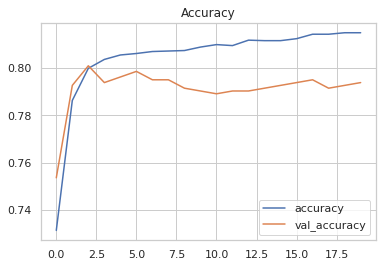

In [249]:
history_func_2_df = pd.DataFrame(history_func_2.history)

history_func_2_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.show()

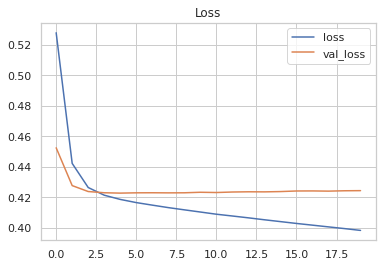

In [250]:
history_func_2_df[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.show()

Pada grafik di atas kita bisa melihat accuracy dan loss yang cukup baik dari model functional. Accuracy pada train set sangat baik karena meningkat pada tiap epochnya, namun pada validation setnya kurang baik karena cenderung naik turun. Pada Loss kita bisa lihat untuk trainnya cukup baik karena turun dengan signifikan tiap epochnya, sedangkan pada validation set cenderung stabil namun meningkat pada akhir epoch.

In [251]:
# Model evaluation using clasification report

y_pred_func_2 = model.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

print('===Sebelum Improvement===')
print(classification_report(y_test_final, y_pred_func))
print('===Setelah Improvement===')
print(classification_report(y_test_final, y_pred_func_2))

===Sebelum Improvement===
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1034
           1       0.71      0.55      0.62       373

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

===Setelah Improvement===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1034
           1       0.72      0.51      0.60       373

    accuracy                           0.82      1407
   macro avg       0.78      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



Dari classification report di atas kita bisa melihat terjadi improvement dimana pada recall label 0 meningkat dari 0.92 menjadi 0.93. Pada label 1 juga mengalami peningkatan pada precision dari 0.71 menjadi 0.72.

## Model Analysis


Dalam kasus ini kita awalnya menggunakan 2 baseline model untuk melakukan klasifikasi churn. Model yang digunakan ada dua jenis yaitu sequential dan functional. Kedua model mampu belajar dengan baik, hal itu dibuktikan dari grafik loss dan accuracy dimana kedua model menghasilkan loss yang rendah, accuracy yang tinggi, dan juga tidak overfit. Kedua model tersebut juga bisa menghasilkan classification report yang cukup baik pada test-set hanya dengan menggunakan **189 parameter** saja. 

Kedua model tersebut dicoba untuk diimprove dengan mengubah jumlah neuron, hidden layer, activation, dan lain-lain. Pada model sequential saya tambahkan jumlah hidden layer dari 1 hidden layer menjadi 3 hidden layer dimana pada hidden layer pertama ditambahkan initializer glorot, selain itu jumlah neuron juga diubah menjadi 32 pada hidden layer pertama, 16 pada hidden layer kedua, dan 8 pada hidden layer ketiga. Saya juga mengganti optimizer model dari adam menjadi nadam dan juga jumlah epoch dari 10 menjadi 20.  Perubahan yang sama dilakukan juga pada functional model dengan perbedaan pada functional model tidak menggunakan initializer glorot. Perubahan kedua arsitektur tersebut merubah jumlah **parameter** dari **189 menjadi 2145** untuk kedua model.



Model hasil improvement berhasil meningkatkan hasil, namun cenderung overfit saat training, hal tersebut bisa dilihat dari grafik loss dan accuracy dimana terdapat gap yang lebih besar antara train dan validation set dibandingkan dengan pada baseline model. Pada classification report kita bisa melihat peningkatan pada model sequential dan juga functional. 
* Dari classification report sequential kita bisa melihat bahwa ternyata ada peningkatan pada precision label 0 dari 0.85 menjadi 0.86 dan recall label 1 dari 0.55 menjadi 0.57.
* Dari classification report di functional kita bisa melihat terjadi improvement dimana pada recall label 0 meningkat dari 0.92 menjadi 0.93. Pada label 1 juga mengalami peningkatan pada precision dari 0.71 menjadi 0.72.

# 9 - Model Inference

## Inferencing

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set. Kita akan memilih untuk menggunakan functional model hasil improvement untuk melakukan klasifikasi pada inference set.

In [290]:
# Memilih fitur yang akan digunakan
data_inf.drop(columns=['customerID'], axis=1, inplace=True)


In [291]:
# Menggunakan preproccess pipeline pada data inf

data_inf_final = preprocess.transform(data_inf)

In [292]:
# Melakukan encode pada target data inf
data_inf_target = labelenc.transform(data_inf['Churn'])

In [293]:
# melakukan predict pada inference set
y_pred_inf = model.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5, 'Yes', 'No')

In [294]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Functional Prediction'])

In [295]:
pred_inf = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
pred_inf

,Churn,Functional Prediction
0,Yes,No
1,No,No
2,No,No
3,Yes,Yes
4,No,No
5,No,No
6,No,No
7,Yes,No
8,No,No
9,No,No


In [296]:
print('----Inference Set----')
print(classification_report(data_inf['Churn'], y_pred_inf_df))

----Inference Set----
              precision    recall  f1-score   support

          No       0.78      1.00      0.88         7
         Yes       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



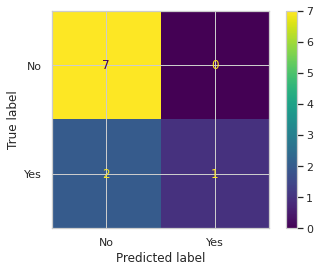

In [297]:
ConfusionMatrixDisplay.from_predictions(data_inf['Churn'], y_pred_inf_df)
plt.show()

Hasil klasifikasi model inference cukup baik dengan accuracy 0.80 pada classification report. Dari 7 orang yang aslinya tidak churn kita berhasil mengklasifikasikan tidak churn. Dari 3 orang yang aslinya churn, kita berhasil mengklasifikasikan 1 orang churn dan 2 orang salah klasifikasi menjadi tidak churn padahal aslinya churn.

# 10 - Kesimpulan

Dataset kali ini berisi data customer Telco, dimana Telco adalah salah satu perusahaan telekomunikasi yang menyediakan beberapa layanan seperti layanan telfon, internet, streaming tv, dan lain-lain. Jumlah perbandingan churn dan tidak churn imbalance karena yang tidak churn memiliki persentase sebesar 73.5% dan yang churn hanya 26.5%. Customer telco memiliki jumlah gender yang hampir setara antara pria dan wanita. Customer kita juga beragam dari orang dewasa hingga orang lanjut usia. Lamanya customer kita sudah berlangganan juga beragam dari 1 bulan hingga 72 bulan dengan rata-rata sudah berlangganan 32 bulan. Kita juga tahu ternyata sudah banyak customer kita yang berlangganan telfon sebanyak 90.3% dimana ada yang menggunakan multiple lines ada juga yang tidak. Kita juga lihat ada 78.4% orang yang sudah berlangganan internet dengan jenis fiber optic dan juga DSL. Dan untuk orang yang berlangganan internet, telco menawarkan banyak fasilitas seperti online security, online backup, device protection, tech support, streaming tv, dan streaming movies. Fitur payments yang ditawarkan oleh telco juga beragam, kita bisa memilih beragam waktu kontrak dari perbulan, 1 tahun, dan 2 tahun. Kita juga bisa memilih untuk menerima tagihan berbentuk kertas atau online, dan juga kita bisa memilih metode pembayaran seperti bank transfer, credit card, cek, dan online cek.

Dalam kasus ini kita berfokus pada target churn. Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita, maka dari itu tujuan kita adalah untuk meminimalisir churn rate. Menurut saya kita harus lebih berfokus pada label 0 dimana kita harus bisa menjaga agar customer tersebut tidak akan memutuskan hubungan dengan perusahaan sambil bisa mencari customer baru. Dengan fokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang bertahan supaya mereka tetap bertahan dan tidak churn.

Model yang buat untuk melakukan klasifikasi churn customer kali ini ada dua yaitu sequential model dan juga functional model. Kedua model dibentuk dengan arsitektur yang sama yaitu menggunakan 1 hidden layer dengan jumlah neuron 4 dan 1 output layer dengan 1 neuron. Kedua model menghasilkan performa yang cukup baik dilihat dari grafik loss dan accuracy saat training yang cukup baik dan juga tidak overfit. Untuk classification report kita mendapatkan accuracy yang sama untuk kedua model yaitu 0.82.

Model sequential dan functional yang sudah dibuat tadi dicoba untuk diimprove dengan mengganti hyperparameternya. Pada model sequential saya tambahkan jumlah hidden layer dari 1 hidden layer menjadi 3 hidden layer dimana pada hidden layer pertama ditambahkan initializer glorot, selain itu jumlah neuron juga diubah menjadi 32 pada hidden layer pertama, 16 pada hidden layer kedua, dan 8 pada hidden layer ketiga. Saya juga mengganti optimizer model dari adam menjadi nadam dan juga jumlah epoch dari 10 menjadi 20.  Perubahan yang sama dilakukan juga pada functional model dengan perbedaan pada functional model tidak menggunakan initializer glorot. Perubahan kedua arsitektur tersebut merubah jumlah **parameter** dari **189 menjadi 2145** untuk kedua model.

Hasil Improve :
* Dari classification report sequential kita bisa melihat bahwa ternyata ada peningkatan pada precision label 0 dari 0.85 menjadi 0.86 dan recall label 1 dari 0.55 menjadi 0.57.
* Dari classification report di functional kita bisa melihat terjadi improvement dimana pada recall label 0 meningkat dari 0.92 menjadi 0.93. Pada label 1 juga mengalami peningkatan pada precision dari 0.71 menjadi 0.72.


**Saran** :

Pada data ini kita berfokus pada label 0 dimana datanya lebih banyak sehingga kita bisa mendapatkan hasil precision dan recall yang sudah bagus, namun jika kita ingin lebih fokus ke label 1 atau orang yang churn disarankan untuk menghandling imbalance data terlebih dahulu sehingga precision dan recall label 1 bisa meningkat.



# Model Saving

In [298]:
# freeze model
model.trainable = False

In [299]:
#save model functional
model.save("model_functional")

In [300]:
! zip -r model_functional.zip model_functional

  adding: model_functional/ (stored 0%)
  adding: model_functional/variables/ (stored 0%)
  adding: model_functional/variables/variables.index (deflated 65%)
  adding: model_functional/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: model_functional/keras_metadata.pb (deflated 88%)
  adding: model_functional/saved_model.pb (deflated 88%)
  adding: model_functional/assets/ (stored 0%)


In [301]:
#save pipline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))